In [2]:
import pandas as pd
import numpy as np
from numpy import unique, where
import matplotlib.pyplot as plt
import dataframe_image as dfi
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, RobustScaler, OneHotEncoder, LabelBinarizer
import seaborn as sns
from scipy import stats
from sklearn.metrics import classification_report
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = "0"
pd.options.mode.chained_assignment = None
# %matplotlib widget
pd.set_option('display.max_rows', None)

In [3]:
df1 = pd.read_csv("datasets/My phone's data/android1.csv")
df2 = pd.read_csv("datasets/My phone's data/android2.csv")
df3 = pd.read_csv("datasets/My phone's data/android3.csv")
df4 = pd.read_csv("datasets/My phone's data/android4.csv")

# Data Preprocessing

In [4]:
df = pd.concat([df1,df2,df3,df4], ignore_index=True).reset_index(drop=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528614 entries, 0 to 2528613
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   No.          int64  
 1   Time         float64
 2   Source       object 
 3   Destination  object 
 4   Protocol     object 
 5   Length       int64  
 6   App name     object 
 7   UID          int64  
 8   Magic        object 
 9   Info         object 
dtypes: float64(1), int64(3), object(6)
memory usage: 192.9+ MB


In [8]:
df.describe()

,No.,Time,Length,UID
count,2.528614e+06,2.528614e+06,2.528614e+06,2.528614e+06
mean,7.152411e+05,2.161335e+04,1.465581e+03,1.036436e+04
std,5.371348e+05,1.733536e+04,1.890311e+03,3.467837e+02
min,1.000000e+00,0.000000e+00,8.800000e+01,-1.000000e+00
25%,2.531130e+05,7.220984e+03,1.308000e+03,1.029500e+04
50%,5.691895e+05,1.416455e+04,1.308000e+03,1.044600e+04
75%,1.169893e+06,4.472658e+04,1.308000e+03,1.044600e+04
max,1.802046e+06,4.773581e+04,1.004800e+04,1.044600e+04


In [5]:
df = df.dropna()
df.isnull().values.any()

False

In [6]:
len(df)

2527569

In [6]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.215.173.2,DNS,116,Meta Services,10081,0x01072021,Standard query 0xf8be A mqtt-mini.facebook.com
1,2,0.036580,10.215.173.1,10.215.173.2,TCP,112,netd,1051,0x01072021,58520 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...
2,3,0.048288,10.215.173.1,157.240.27.34,TCP,108,Meta Services,10081,0x01072021,45270 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
3,4,0.053258,10.215.173.2,10.215.173.1,DNS,404,Meta Services,10081,0x01072021,Standard query response 0xf8be A mqtt-mini.fac...
4,5,0.072994,157.240.27.34,10.215.173.1,TCP,96,Meta Services,10081,0x01072021,"443 > 45270 [SYN, ACK] Seq=0 Ack=1 Win=1024 ..."


In [8]:
df['UID'].unique()

array([10081,  1051, 10255, 10241, 10295,  5018, 10128, 10286, 10292,
       10240, 10274, 10300, 10446, 10288,  5009, 10105, 10242, 10223,
       10279, 10112, 10299, 10245,  1000, 10150, 10075, 10294, 10257,
        5010, 10372, 10357,    -1, 10009, 10061, 10246, 10085, 10306,
       10333,  5026, 10119,  1020, 10108, 10254,  1021, 10256, 10443,
       10327, 10249, 10277, 10319, 10118, 10091, 10392])

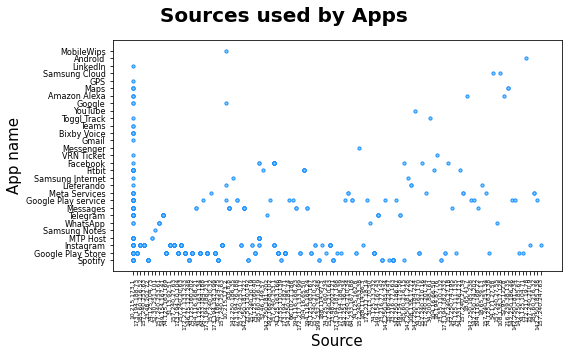

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Sources used by Apps", fontsize=20, fontweight='bold')

ax.scatter(df['Source'].sample(n=2000, random_state=1), df['App name'].sample(n=2000, random_state=1), 
           s=10, color='lightskyblue', edgecolor='dodgerblue')

ax.set_xlabel("Source", fontsize=15)
ax.set_ylabel("App name", fontsize=15)
# ax.set_xticks(df['Source'][::2])
# ax.set_xticklabels(df['Source'][::2])
# ax.set_yticks(df['App name'][::2])
# ax.set_yticklabels(df['App name'][::2])

plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
# df.groupby(['App name']).count().filter(items=['Source']).sort_values(by=['Source'])

In [ ]:
# df.groupby(['App name']).count().filter(items=['Length']).sort_values(by=['Length'])

In [ ]:
# df.groupby(['App name']).unique().count().filter(items=['Protocol']).sort_values(by=['Protocol'])

In [ ]:
# df.groupby(['App name']).sum().filter(items=['Time']).sort_values(by=['Time'])

In [8]:
df_copy = df.copy()

In [9]:
df_enc_sca = df_copy.drop(columns=['No.','Info','Magic','App name'])

In [10]:
enc = OrdinalEncoder()
df_enc_sca['Source'] = enc.fit_transform(df_enc_sca['Source'].values.reshape(-1,1))
df_enc_sca['Destination'] = enc.fit_transform(df_enc_sca['Destination'].values.reshape(-1,1))
df_enc_sca['Protocol'] = enc.fit_transform(df_enc_sca['Protocol'].values.reshape(-1,1))

In [11]:
enc = StandardScaler()
df_enc_sca['Time'] = enc.fit_transform(df_enc_sca['Time'].values.reshape(-1,1))
df_enc_sca['Source'] = enc.fit_transform(df_enc_sca['Source'].values.reshape(-1,1))
df_enc_sca['Destination'] = enc.fit_transform(df_enc_sca['Destination'].values.reshape(-1,1))
df_enc_sca['Protocol'] = enc.fit_transform(df_enc_sca['Protocol'].values.reshape(-1,1))
df_enc_sca['Length'] = enc.fit_transform(df_enc_sca['Length'].values.reshape(-1,1))
df_enc_sca['UID'] = enc.fit_transform(df_enc_sca['UID'].values.reshape(-1,1))

In [12]:
df_cor = df_enc_sca.corr()

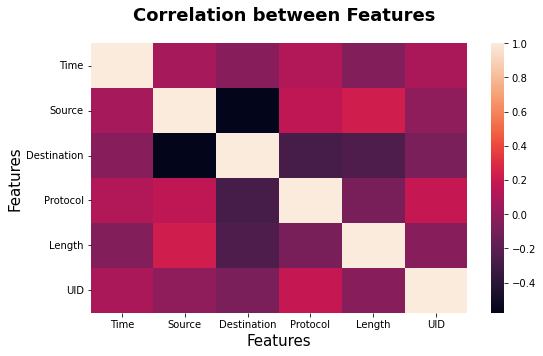

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Correlation between Features", fontsize=18, fontweight='bold')

sns.heatmap(df_cor)

ax.set_xlabel("Features", fontsize=15)
ax.set_ylabel("Features", fontsize=15)

plt.tight_layout()
plt.show()

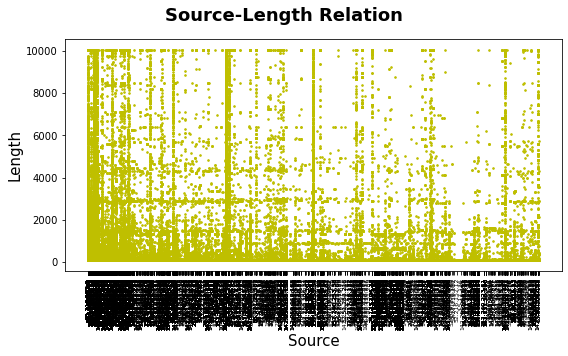

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Source-Length Relation", fontsize=18, fontweight='bold')

ax.scatter(df['Source'], df['Length'], s=10, marker='.', color='y')

ax.set_xlabel("Source", fontsize=15)
ax.set_ylabel("Length", fontsize=15)
ax.set_xticks(df['Source'][::20])
ax.set_xticklabels(df['Source'][::20])

plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

In [18]:
sou_len_agg = df.groupby('Source').agg({'Length':sum}).sort_values(by='Length', ascending=False)
sou_len_agg.head(10)

,Length
Source,
157.240.253.63,791907104
23.48.202.72,686321952
185.60.216.52,420561204
31.13.92.51,388059760
157.240.20.63,230349956
10.215.173.1,142759992
185.60.216.19,128340176
74.125.160.202,104018912
23.216.77.142,68246976


In [19]:
df['App name'][df['Source']=="157.240.253.63"].unique()

array(['Instagram'], dtype=object)

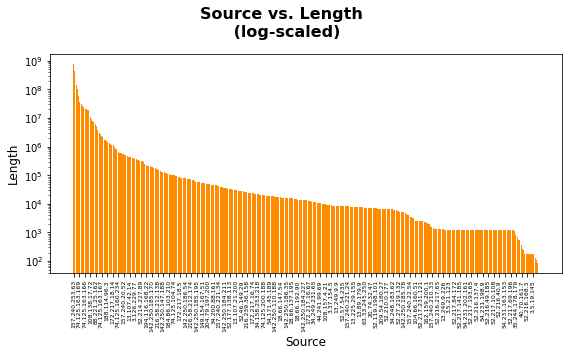

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Source vs. Length \n (log-scaled)", fontweight='bold', fontsize=16)

ax.bar(sou_len_agg.index, sou_len_agg['Length'], color='darkorange')

ax.set_xlabel("Source", fontsize=12)
ax.set_ylabel("Length", fontsize=12)
ax.set_xticks(sou_len_agg.index[::10])
ax.set_xticklabels(sou_len_agg.index[::10])
ax.set_yscale('log')

plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

In [21]:
sou_len_agg['Length'].mean()

4464202.7710843375

In [22]:
app_len_agg = df.groupby('App name').agg({'Length':sum})

In [23]:
app_len_agg[app_len_agg['Length']>sou_len_agg['Length'].mean()].sort_values(by='Length', ascending=False)

,Length
App name,
Instagram,1939296416
Spotify,1008904972
Google Play Store,352302488
MTP Host,141644568
Telegram,60525804
WhatsApp,39692224
Messages,39322664
Facebook,28218980
Google Play service,20574492


In [24]:
app_sou_agg = df.groupby('App name').agg('Destination').unique()
app_sou_agg

App name
Amazon Alexa           [10.215.173.2, 10.215.173.1, 54.187.92.102, 54...
Android                [188.114.96.3, 10.215.173.1, 10.215.173.2, 172...
Android System WebV    [10.215.173.2, 10.215.173.1, 142.250.74.195, 1...
AppCloud               [10.215.173.2, 10.215.173.1, 142.250.185.195, ...
Bixby Voice            [10.215.173.2, 10.215.173.1, 18.66.147.106, 18...
Calendar               [10.215.173.2, 10.215.173.1, 142.250.186.170, ...
Customization Servi    [10.215.173.2, 10.215.173.1, 13.32.121.57, 3.3...
Docs                       [10.215.173.2, 10.215.173.1, 142.250.185.202]
Facebook               [10.215.173.2, 10.215.173.1, 157.240.27.18, 15...
Fitbit                 [10.215.173.2, 10.215.173.1, 104.16.66.50, 104...
GPS                    [10.215.173.2, 10.215.173.1, 18.66.122.7, 13.2...
Galaxy Store                [10.215.173.2, 10.215.173.1, 163.171.128.27]
Gallery                      [10.215.173.2, 10.215.173.1, 54.216.95.112]
Game Optimizing Ser    [10.215.173.2, 10.2

In [25]:
count=[]
app=[]

for i, item in app_sou_agg.iteritems():
    count.append(len(app_sou_agg[i]))
    app.append(i)
    
app_cou_df = pd.DataFrame(data=app, columns=['App name'])
app_cou_df['DesCount'] = count
app_cou_df.sort_values(by='DesCount', ascending=False)

,App name,DesCount
9,Fitbit,221
17,Google Play service,92
16,Google Play Store,86
19,Instagram,64
39,Samsung Internet,53
0,Amazon Alexa,43
43,Spotify,41
49,WhatsApp,41
31,MobileWips,41
8,Facebook,31


In [26]:
im = app_cou_df[app_cou_df['DesCount']>=10].sort_values(by='DesCount', ascending=False)
dfi.export(im, "DesCount.png")
im

[0728/111905.645658:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/111906.170218:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/111906.259016:INFO:headless_shell.cc(660)] Written to file /tmp/tmpjsmyhwg1/temp.png.


,App name,DesCount
9,Fitbit,221
17,Google Play service,92
16,Google Play Store,86
19,Instagram,64
39,Samsung Internet,53
0,Amazon Alexa,43
49,WhatsApp,41
43,Spotify,41
31,MobileWips,41
8,Facebook,31


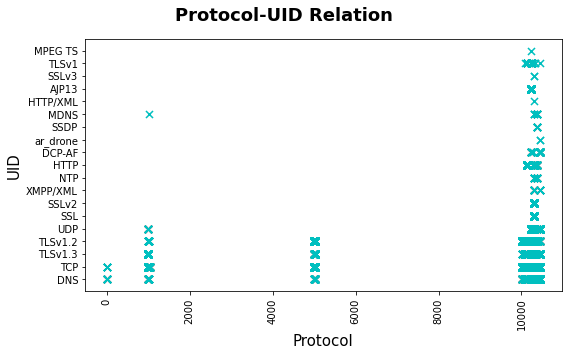

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Protocol-UID Relation", fontsize=18, fontweight='bold')

ax.scatter(df['UID'],df['Protocol'],  marker='x', s=50, color='c')

ax.set_xlabel('Protocol', fontsize=15)
ax.set_ylabel('UID', fontsize=15)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
df['App name'][df['UID']>=10000].unique()

array(['Meta Services', 'Messages', 'Google Play service', 'Spotify',
       'Fitbit', 'Samsung Health', 'Telegram', 'Google Play Store',
       'Facebook', 'WhatsApp', 'Instagram', 'Samsung Notes',
       'Photo Editor', 'Google', 'Meta App Manager', 'Samsung Internet',
       'Samsung account', 'Messenger', 'Meet', 'Link to Windows',
       'MTP Host', 'LinkedIn', 'Maps', 'MobileWips', 'Toggl Track',
       'Teams', 'AppCloud', 'Calendar', 'Game Optimizing Ser',
       'Amazon Alexa', 'Lieferando', 'Gallery', 'Samsung Push Servic',
       'YouTube', 'Gmail', 'Docs', 'VRN Ticket', 'Android System WebV',
       'Kleinanzeigen', 'Radio Javan', 'Group Sharing', 'Galaxy Store',
       'Mobiles Bezahlen'], dtype=object)

In [29]:
df.groupby(['App name','Protocol']).size()

App name             Protocol
Amazon Alexa         DNS              80
                     TCP            2748
                     TLSv1.2        1634
                     TLSv1.3         436
Android              DNS              54
                     TCP             720
                     TLSv1.2          13
                     TLSv1.3         569
                     UDP              45
Android System WebV  DNS               6
                     TCP              45
                     TLSv1.3          24
AppCloud             DNS              16
                     TCP              95
                     TLSv1.2          29
                     TLSv1.3          26
Bixby Voice          DNS             138
                     TCP            1959
                     TLSv1.2         380
                     TLSv1.3         719
Calendar             DNS              17
                     TCP             171
                     TLSv1.2          61
                     TLSv1.

In [30]:
df['UID'].unique()

array([10081,  1051, 10255, 10241, 10295,  5018, 10128, 10286, 10292,
       10240, 10274, 10300, 10446, 10288,  5009, 10105, 10242, 10223,
       10279, 10112, 10299, 10245,  1000, 10150, 10075, 10294, 10257,
        5010, 10372, 10357,    -1, 10009, 10061, 10246, 10085, 10306,
       10333,  5026, 10119,  1020, 10108, 10254,  1021, 10256, 10443,
       10327, 10249, 10277, 10319, 10118, 10091, 10392])

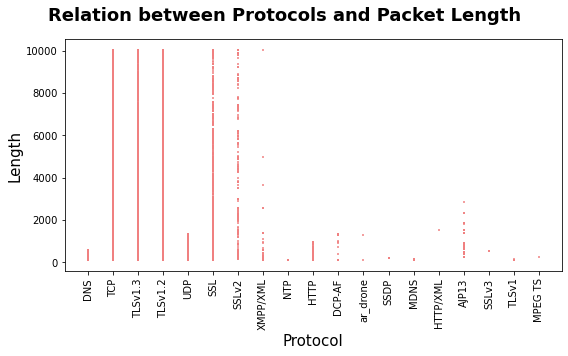

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Relation between Protocols and Packet Length", fontsize=18, fontweight='bold')

ax.scatter(df['Protocol'], df['Length'], s=5, marker='_', color='lightcoral')

ax.set_xlabel("Protocol", fontsize=15)
ax.set_ylabel("Length", fontsize=15)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
pro_len_agg = df.groupby('Protocol').agg({'Length':sum}).sort_values(by='Length', ascending=False)

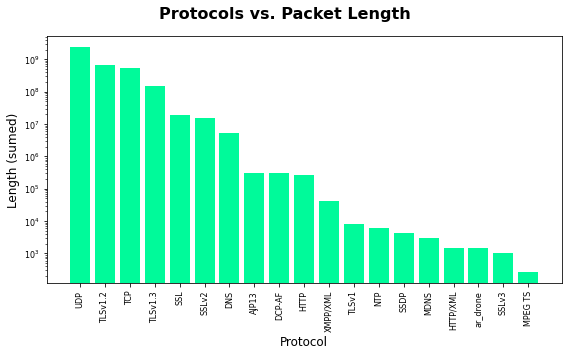

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Protocols vs. Packet Length", fontsize=16, fontweight='bold')

ax.bar(pro_len_agg.index, pro_len_agg['Length'], color='mediumspringgreen')

ax.set_xlabel("Protocol", fontsize=12)
ax.set_ylabel("Length (sumed)", fontsize=12)
ax.set_yscale('log')

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [34]:
plt.close('all')

In [35]:
df['App name'][df['Protocol']=='UDP'].unique().reshape(-1,1)

array([['Google Play service'],
       ['Facebook'],
       ['Instagram'],
       ['Google'],
       ['Google Play Store'],
       ['Messenger'],
       ['Meet'],
       ['Messages'],
       ['Maps'],
       ['MobileWips'],
       ['Calendar'],
       ['YouTube'],
       ['Gmail'],
       ['Radio Javan'],
       ['Android']], dtype=object)

In [36]:
app_pro_agg = df.groupby('App name').agg('Protocol').unique()
app_pro_agg

App name
Amazon Alexa                                [DNS, TCP, TLSv1.2, TLSv1.3]
Android                                [TCP, TLSv1.3, DNS, UDP, TLSv1.2]
Android System WebV                                  [DNS, TCP, TLSv1.3]
AppCloud                                    [DNS, TCP, TLSv1.3, TLSv1.2]
Bixby Voice                                 [DNS, TCP, TLSv1.3, TLSv1.2]
Calendar                               [DNS, TCP, TLSv1.2, TLSv1.3, UDP]
Customization Servi                         [DNS, TCP, TLSv1.3, TLSv1.2]
Docs                                                 [DNS, TCP, TLSv1.2]
Facebook                                [DNS, TCP, UDP, TLSv1.3, DCP-AF]
Fitbit                         [DNS, TCP, TLSv1.3, HTTP, TLSv1.2, TLSv1]
GPS                                                  [DNS, TCP, TLSv1.2]
Galaxy Store                                         [DNS, TCP, TLSv1.3]
Gallery                                              [DNS, TCP, TLSv1.2]
Game Optimizing Ser                       

In [37]:
count=[]
app=[]
for i, item in app_pro_agg.iteritems():
    count.append(len(app_pro_agg[i]))
    app.append(i)
    
app_pro_count = pd.DataFrame(data=app, columns=['App name'])
app_pro_count['ProtocolCount'] = count
app_pro_count.sort_values(by='ProtocolCount', ascending=False)

,App name,ProtocolCount
43,Spotify,10
19,Instagram,9
17,Google Play service,9
25,Maps,7
16,Google Play Store,7
31,MobileWips,7
49,WhatsApp,7
45,Telegram,6
27,Messages,6
9,Fitbit,6


In [38]:
import dataframe_image as dfi
im = app_pro_count[app_pro_count['ProtocolCount']>=5].sort_values(by='ProtocolCount', ascending=False)
dfi.export(im, "ProCount.png")
im

[0728/111938.182816:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/111938.678832:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/111938.766637:INFO:headless_shell.cc(660)] Written to file /tmp/tmpycijuz6a/temp.png.


,App name,ProtocolCount
43,Spotify,10
17,Google Play service,9
19,Instagram,9
25,Maps,7
31,MobileWips,7
49,WhatsApp,7
16,Google Play Store,7
27,Messages,6
9,Fitbit,6
45,Telegram,6


In [39]:
app_time_agg = df.groupby(['App name']).agg({'Time':sum})
app_time_agg.head()

,Time
App name,
Amazon Alexa,6.867759e+07
Android,2.457857e+07
Android System WebV,1.142759e+06
AppCloud,2.348525e+06
Bixby Voice,6.274033e+07


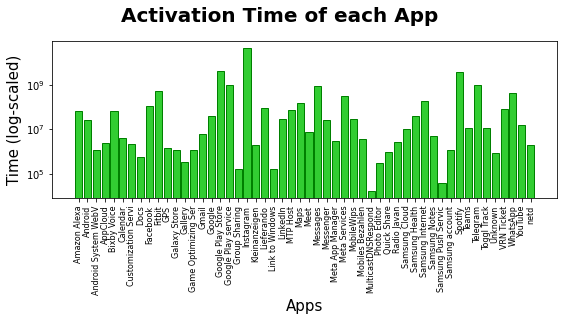

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4.5)
fig.suptitle("Activation Time of each App", fontweight='bold', fontsize=20)

ax.bar(app_time_agg.index, app_time_agg['Time'], color='limegreen', edgecolor='green')

# ax.set_xticks(gp_agg.index[::2])
# ax.set_xticklabels(gp_agg.index[::2])

ax.set_xlabel("Apps", fontsize=15)
ax.set_ylabel("Time (log-scaled)", fontsize=15)
ax.set_yscale("log")

plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

In [41]:
plt.close('all')

In [42]:
pro_time_agg = df.groupby("Protocol").agg({"Time":sum})
pro_time_agg.head()

,Time
Protocol,
AJP13,4.028039e+06
DCP-AF,5.127419e+06
DNS,5.128275e+08
HTTP,9.142786e+06
HTTP/XML,1.129129e+04


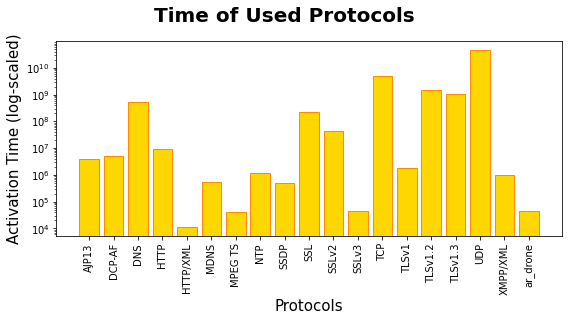

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4.5)
fig.suptitle("Time of Used Protocols", fontsize=20, fontweight='bold')

ax.bar(pro_time_agg.index, pro_time_agg['Time'], color='gold', edgecolor='darkorange')

ax.set_xlabel("Protocols", fontsize=15)
ax.set_ylabel("Activation Time (log-scaled)", fontsize=15)
ax.set_yscale('log')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [44]:
plt.close("all")

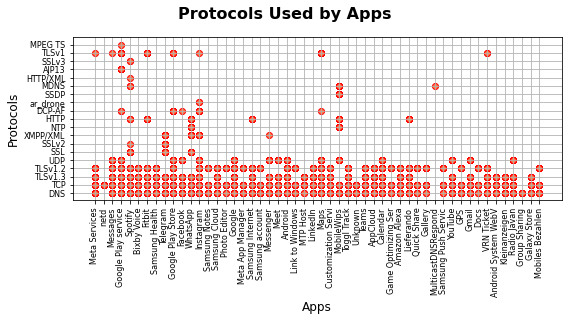

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4.5)
fig.suptitle("Protocols Used by Apps", fontsize=16, fontweight='bold')

ax.scatter(df['App name'], df['Protocol'], color='coral', edgecolor='red')

ax.set_xlabel('Apps', fontsize=12)
ax.set_ylabel('Protocols', fontsize=12)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.grid()
plt.show()

In [46]:
plt.close('all')

In [47]:
app_len_agg = df.groupby('App name').agg({'Length':sum})
app_len_agg.head()

,Length
App name,
Amazon Alexa,9894140
Android,2078804
Android System WebV,42756
AppCloud,102940
Bixby Voice,1847052


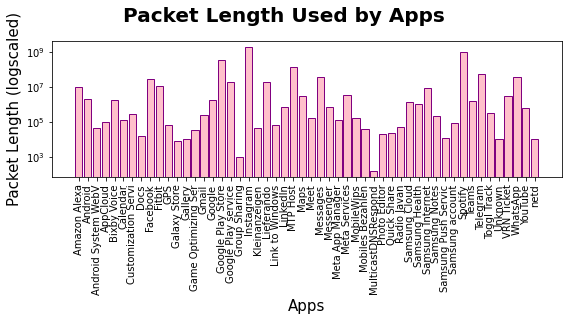

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4.5)
fig.suptitle("Packet Length Used by Apps", fontsize=20, fontweight='bold')

ax.bar(app_len_agg.index, app_len_agg['Length'], color='pink', edgecolor='purple')

ax.set_xlabel("Apps", fontsize=15)
ax.set_ylabel("Packet Length (logscaled)", fontsize=15)
ax.set_yscale('log')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [49]:
plt.close('all')

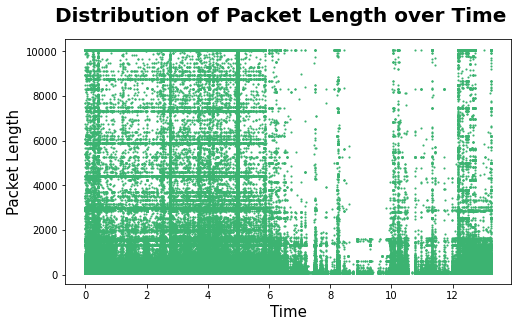

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4.5)
fig.suptitle("Distribution of Packet Length over Time", fontsize=20, fontweight='bold')

ax.scatter(df['Time']/60/60, df['Length'], s=5, marker='.', color='mediumseagreen')

ax.set_xlabel("Time", fontsize=15)
ax.set_ylabel("Packet Length", fontsize=15)

plt.show()

In [51]:
plt.close('all')

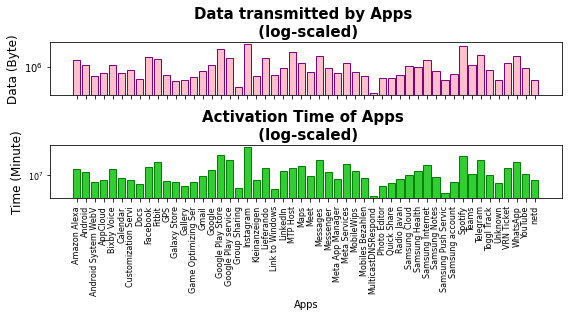

In [52]:
fig, axs = plt.subplots(2,1)
fig.set_size_inches(8,4.5)
# fig.suptitle("Packet Length Used by Apps", fontsize=20, fontweight='bold')

axs[0].bar(app_len_agg.index, app_len_agg['Length'], color='pink', edgecolor='purple')
axs[1].bar(app_time_agg.index, app_time_agg['Time'], color='limegreen', edgecolor='green')

axs[0].set_title("Data transmitted by Apps \n (log-scaled)", fontweight='bold', fontsize=15)
axs[1].set_title("Activation Time of Apps \n (log-scaled)", fontweight='bold', fontsize=15)

axs[0].set_ylabel("Data (Byte)", fontsize=12)
axs[1].set_ylabel("Time (Minute)", fontsize=12)
axs[0].set_yscale('log')
axs[1].set_yscale('log')

for ax in axs.flat:
    # ax.set(xlabel="Apps", fontweight='bold')
    ax.set_xlabel("Apps")
    ax.label_outer()

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [53]:
plt.close('all')

In [54]:
pro_len_agg = df.groupby(['Protocol']).agg({'Length':sum})
pro_len_agg = pro_len_agg.sort_values('Length')
pro_len_agg.head()

,Length
Protocol,
MPEG TS,264
SSLv3,1024
ar_drone,1432
HTTP/XML,1504
MDNS,2964


In [55]:
pro_len_agg.index

Index(['MPEG TS', 'SSLv3', 'ar_drone', 'HTTP/XML', 'MDNS', 'SSDP', 'NTP',
       'TLSv1', 'XMPP/XML', 'HTTP', 'DCP-AF', 'AJP13', 'DNS', 'SSLv2', 'SSL',
       'TLSv1.3', 'TCP', 'TLSv1.2', 'UDP'],
      dtype='object', name='Protocol')

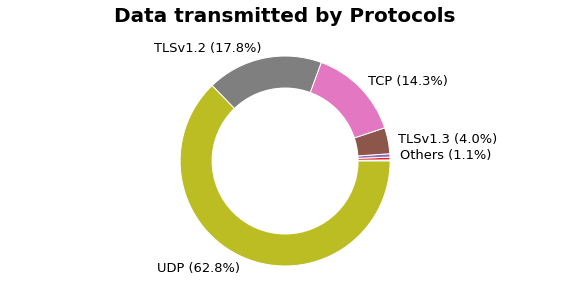

In [56]:
import matplotlib.colors as mcolors

fig, ax = plt.subplots()
fig.set_size_inches(8,4)
fig.suptitle("Data transmitted by Protocols", fontsize=20, fontweight='bold')

sizes = pro_len_agg['Length']
labels = pro_len_agg.index
cm = mcolors.TABLEAU_COLORS
labels=['','','','','','','','','','','','','','','Others (1.1%)','TLSv1.3 (4.0%)','TCP (14.3%)','TLSv1.2 (17.8%)','UDP (62.8%)']

ax.pie(x=sizes, labels=labels, colors=cm, wedgeprops = {'linewidth': 1, 'edgecolor' : 'white'},
      textprops = {'fontsize': 13}, labeldistance=1.1, pctdistance=0.5)

#draw a circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  


# labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, (sizes*100)/pro_len_agg['Length'].sum())]
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=labels, fontsize=8)

plt.tight_layout()
plt.show()

In [57]:
plt.close('all')

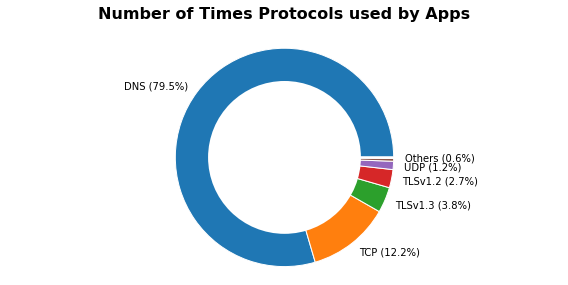

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4)
fig.suptitle("Number of Times Protocols used by Apps", fontsize=16, fontweight='bold')

sizes = df['Protocol'].value_counts()
labels = df['Protocol'].unique()
cm = mcolors.TABLEAU_COLORS
labels=['DNS (79.5%)','TCP (12.2%)','TLSv1.3 (3.8%)','TLSv1.2 (2.7%)','UDP (1.2%)','',
       '','','','','','','','','','','','','Others (0.6%)']


ax.pie(sizes, labels=labels, colors=cm, wedgeprops = {'linewidth': 1, 'edgecolor' : 'white'},
      textprops = {'fontsize': 10}, labeldistance=1.1, pctdistance=0.5)


#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  


# labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, (sizes*100)/df['Protocol'].value_counts().sum())]
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=labels, fontsize=8)

plt.tight_layout()
plt.show()

In [59]:
plt.close('all')

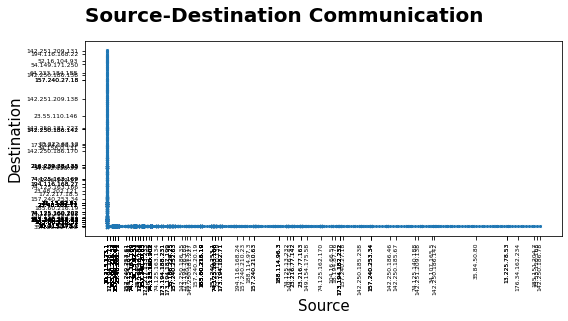

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4.5)
fig.suptitle("Source-Destination Communication", fontsize=20, fontweight='bold')

ax.scatter(df['Source'].sample(n=5000, random_state=1), df['Destination'].sample(n=5000, random_state=1), 
           s=5, marker='x')

ax.set_xlabel("Source", fontsize=15)
ax.set_ylabel("Destination", fontsize=15)
ax.set_xticks(df['Source'].sample(n=5000, random_state=1)[::10])
ax.set_xticklabels(df['Source'].sample(n=5000, random_state=1)[::10])
ax.set_yticks(df['Destination'].sample(n=5000, random_state=1)[::10])
ax.set_yticklabels(df['Destination'].sample(n=5000, random_state=1)[::10])

# plt.grid()
plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

In [61]:
df[(df['Source']!='10.215.173.1') & (df['Destination']!='10.215.173.1')]

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
86148,67,0.920449,192.168.88.144,10.215.173.2,TCP,108,netd,1051,0x01072021,46046 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...
86395,314,1.939966,10.215.173.2,192.168.88.144,TCP,88,netd,1051,0x01072021,"853 > 46046 [RST, ACK] Seq=1 Ack=1 Win=63 Len=0"
125985,57,4.993242,192.168.0.158,10.215.173.2,DNS,116,Meta Services,10081,0x01072021,Standard query 0xe8c8 AAAA mqtt-mini.facebook.com
125986,58,4.998683,192.168.0.158,10.215.173.2,DNS,116,Meta Services,10081,0x01072021,Standard query 0x0a53 A mqtt-mini.facebook.com
125987,59,5.032117,10.215.173.2,192.168.0.158,DNS,160,Meta Services,10081,0x01072021,Standard query response 0x0a53 A mqtt-mini.fac...
125988,60,5.035014,10.215.173.2,192.168.0.158,DNS,172,Meta Services,10081,0x01072021,Standard query response 0xe8c8 AAAA mqtt-mini....


In [62]:
plt.close('all')

# Clustering

In [7]:
df_copy = df.copy()

In [8]:
dfd = df_copy.drop(columns=['No.','Magic','Info','App name','Destination','Time'])
dfd.head()

,Source,Protocol,Length,UID
0,10.215.173.1,DNS,116,10081
1,10.215.173.1,TCP,112,1051
2,10.215.173.1,TCP,108,10081
3,10.215.173.2,DNS,404,10081
4,157.240.27.34,TCP,96,10081


In [9]:
from sklearn.preprocessing import OrdinalEncoder

# inv_df = pd.DataFrame[columns=[]]
enc = OrdinalEncoder()
dfd['Protocol'] = enc.fit_transform(dfd['Protocol'].values.reshape(-1, 1))
inv_df_pro = enc.inverse_transform(dfd['Protocol'].values.reshape(-1, 1))
# dfd['Destination'] = enc.fit_transform(dfd['Destination'].values.reshape(-1,1))
# inv_df_dest = enc.inverse_transform(dfd['Destination'].values.reshape(-1, 1))
dfd['Source'] = enc.fit_transform(dfd['Source'].values.reshape(-1,1))
inv_df_sour = enc.inverse_transform(dfd['Source'].values.reshape(-1, 1))

In [10]:
enc = StandardScaler()

for column in dfd:
    dfd[column] = enc.fit_transform(dfd[column].values.reshape(-1,1))

In [67]:
dfd.head()

,Source,Protocol,Length,UID
0,-1.439636,-6.430922,-0.714033,-0.81696
1,-1.439636,-1.557917,-0.716149,-26.85130
2,-1.439636,-1.557917,-0.718265,-0.81696
3,-1.434804,-6.430922,-0.561701,-0.81696
4,-0.188136,-1.557917,-0.724612,-0.81696


In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=1)
pred = model.fit_predict(dfd)

In [11]:
pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [12]:
model.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# results = pd.DataFrame([dfd.index,labels]).T

In [13]:
from mpl_toolkits.mplot3d import Axes3D

centroids = model.cluster_centers_

a = np.array(pred==0).astype(int)
b = np.array(pred==1).astype(int)
c = np.array(pred==2).astype(int)
# d = np.array(pred==3).astype(int)
# e = np.array(pred==4).astype(int)
# f = np.array(pred==5).astype(int)
# g = np.array(pred==6).astype(int)
# h = np.array(pred==7).astype(int)

ind_a=[]
ind_b=[]
ind_c=[]
# ind_d=[]
# ind_e=[]
# ind_f=[]
# ind_g=[]
# ind_h=[]

for i in range(a.shape[0]):
    if a[i]==1:
        ind_a.append(i)
for j in range(b.shape[0]):
    if b[j]==1:
        ind_b.append(j)
for k in range(c.shape[0]):
    if c[k]==1:
        ind_c.append(k)
# for m in range(d.shape[0]):
#     if d[m]==1:
#         ind_d.append(m)
# for n in range(e.shape[0]):
#     if e[n]==1:
#         ind_e.append(n)
# for q in range(f.shape[0]):
#     if f[q]==1:
#         ind_f.append(q)
# for r in range(g.shape[0]):
#     if g[r]==1:
#         ind_g.append(r)
# for s in range(h.shape[0]):
#     if h[s]==1:
#         ind_h.append(s)

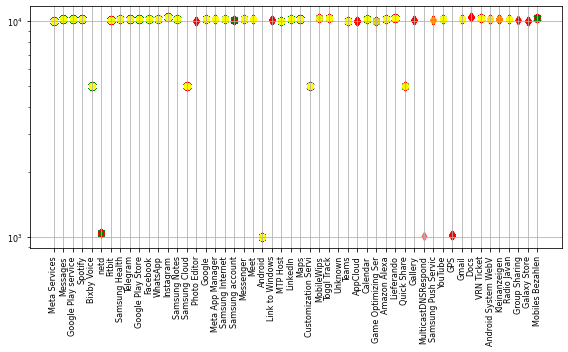

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
# ax = fig.add_subplot(111, projection='3d')

   
ax.scatter(df[df.index.isin(ind_a)]['App name'], 
           df[df.index.isin(ind_a)]['UID'], alpha=0.5, c='red', marker='d') 
ax.scatter(df[df.index.isin(ind_b)]['App name'],
           df[df.index.isin(ind_b)]['UID'], alpha=0.5, c='green', marker='x')
ax.scatter(df[df.index.isin(ind_c)]['App name'],
           df[df.index.isin(ind_c)]['UID'], alpha=0.5, c='yellow')
# ax.scatter(df[df.index.isin(ind_d)]['App name'],
#            df[df.index.isin(ind_d)]['UID'], alpha=0.5, c='blue', marker='_')
# ax.scatter(df[df.index.isin(ind_e)]['App name'],
#            df[df.index.isin(ind_e)]['UID'], alpha=0.5, c='violet', marker='*')
# ax.scatter(scal_dfd[scal_dfd.index.isin(ind_a)]['App name'], 
#            scal_dfd[scal_dfd.index.isin(ind_a)]['App name'], alpha=0.5) 
# ax.scatter(scal_dfd[scal_dfd.index.isin(ind_b)]['App name'],
#            scal_dfd[scal_dfd.index.isin(ind_b)]['App name'], alpha=0.5)
# ax.scatter(scal_dfd[scal_dfd.index.isin(ind_c)]['App name'],
#            scal_dfd[scal_dfd.index.isin(ind_c)]['App name'], alpha=0.1)
# ax.scatter(scal_dfd[scal_dfd.index.isin(ind_d)]['Destination'],
#            scal_dfd[scal_dfd.index.isin(ind_d)]['Protocol'], 
#            scal_dfd[scal_dfd.index.isin(ind_d)]['Length'],
#            c='red', alpha=0.5)
# ax.scatter(scal_dfd[scal_dfd.index.isin(ind_e)]['Destination'],
#            scal_dfd[scal_dfd.index.isin(ind_e)]['Protocol'], 
#            scal_dfd[scal_dfd.index.isin(ind_e)]['Length'],
#            c='blue', alpha=0.5)
# ax.scatter(scal_dfd[scal_dfd.index.isin(ind_f)]['Destination'],
#            scal_dfd[scal_dfd.index.isin(ind_f)]['Protocol'], 
#            scal_dfd[scal_dfd.index.isin(ind_f)]['Length'],
#            c='y', alpha=0.5)
# ax.scatter(scal_dfd[scal_dfd.index.isin(ind_g)]['Destination'],
#            scal_dfd[scal_dfd.index.isin(ind_g)]['Protocol'], 
#            scal_dfd[scal_dfd.index.isin(ind_g)]['Length'],
#            c='c', alpha=0.5)
# ax.scatter(scal_dfd[scal_dfd.index.isin(ind_h)]['Destination'],
#            scal_dfd[scal_dfd.index.isin(ind_h)]['Protocol'], 
#            scal_dfd[scal_dfd.index.isin(ind_h)]['Length'],
#            c='lime', alpha=0.5)
# ax.scatter(centroids[:,0], centroids[:,1], c='black', marker='x', s=100)

ax.set_yscale('log')

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.grid()
plt.tight_layout()
plt.show()

In [15]:
plt.close('all')

In [17]:
# dfd['Protocol'] = inv_df_pro
# dfd['Destination'] = inv_df_dest
# dfd['Source'] = inv_df_sour

In [ ]:
dfd['App name'] = df_copy['App name']

In [ ]:
label_a = dfd[dfd.index.isin(ind_a)]

In [ ]:
label_a.head()

In [ ]:
len(label_a.groupby(['App name']).size())

## Affinity Propagation

In [19]:
# from sklearn.cluster import AffinityPropagation
# from numpy import where, unique

# model = AffinityPropagation(damping=0.99, verbose=True)
# pred = model.fit_predict(dfd.sample(n=15000, random_state=1))
# clusters = unique(pred)
# print("Number of found clusters: ",len(clusters))


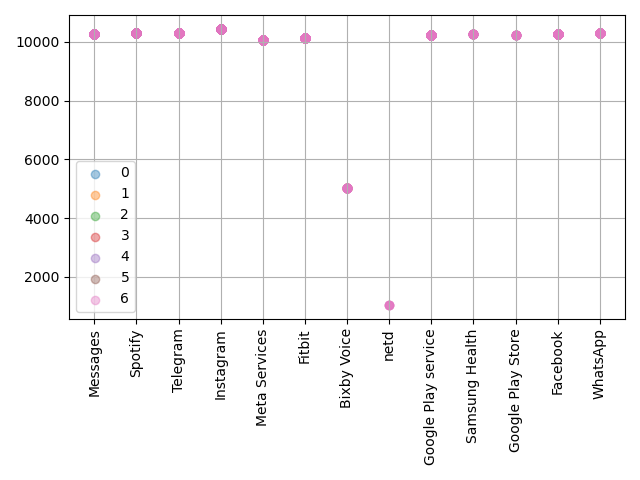

In [76]:
import matplotlib.colors as mcolors
cm = mcolors.TABLEAU_COLORS

for cluster in clusters:
    row_ix = where(pred==cluster)
    # print(len(row_ix))
    # print(row_ix)
    plt.scatter(df[df.index.isin(row_ix[0])]['App name'], 
                df[df.index.isin(row_ix[0])]['UID'], alpha=0.4, label=cluster)
    
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [77]:
plt.close('all')

## Agglomerative

In [25]:
from sklearn.cluster import AgglomerativeClustering
#linkage?

model = AgglomerativeClustering(n_clusters=3)
pred = model.fit_predict(dfd.sample(50000, random_state=1))
clusters = unique(pred)
print("Number of found clusters: ", len(clusters))

Number of found clusters:  3


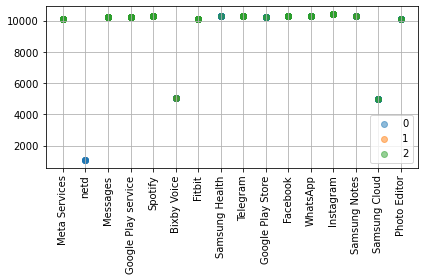

In [26]:
for cluster in clusters:
    row_ix = where(pred==cluster)
    row_ix = np.asarray(row_ix)
    plt.scatter(df[df.index.isin(row_ix[0])]['App name'], 
                df[df.index.isin(row_ix[0])]['UID'], alpha=0.5, label=cluster)
    
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [27]:
plt.close('all')

## BIRCH

In [28]:
from sklearn.cluster import Birch

model = Birch(threshold=0.1, n_clusters=5)
pred = model.fit_predict(dfd)
clusters = unique(pred)
print("Number of found clusters: ", len(clusters))

Number of found clusters:  5


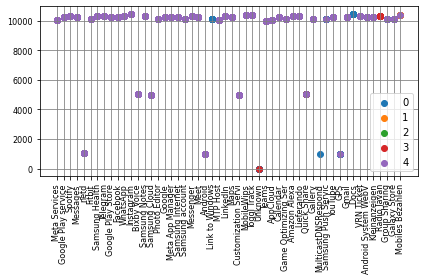

In [29]:
fig, ax = plt.subplots()

for cluster in clusters:
    row_ix = where(pred==cluster)    
    plt.scatter(df[df.index.isin(row_ix[0])]['App name'], 
                df[df.index.isin(row_ix[0])]['UID'], label=cluster)

# ax.set_axisbelow(True)
ax.xaxis.grid(color='gray')
ax.yaxis.grid(color='gray')

plt.legend()
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
# plt.grid()
plt.show()

In [30]:
plt.close('all')

In [31]:
df['Predictions'] = pred

In [32]:
df['App name'][df['Predictions']==0].unique()

array(['Meta Services', 'Google Play service', 'Spotify', 'Messages',
       'Fitbit', 'Samsung Health', 'Telegram', 'Google Play Store',
       'Facebook', 'WhatsApp', 'Instagram', 'Samsung Notes',
       'Photo Editor', 'Google', 'Meta App Manager', 'Samsung Internet',
       'Samsung account', 'Messenger', 'Meet', 'Link to Windows',
       'MTP Host', 'LinkedIn', 'Maps', 'MobileWips', 'Toggl Track',
       'Teams', 'AppCloud', 'Calendar', 'Game Optimizing Ser',
       'Amazon Alexa', 'Lieferando', 'Gallery', 'Samsung Push Servic',
       'YouTube', 'Gmail', 'Docs', 'VRN Ticket', 'Android System WebV',
       'Kleinanzeigen', 'Radio Javan', 'Galaxy Store', 'Mobiles Bezahlen'],
      dtype=object)

In [33]:
df['App name'][df['Predictions']==1].unique()

array(['Bixby Voice', 'Samsung Cloud', 'Customization Servi',
       'Quick Share'], dtype=object)

In [34]:
df['App name'][df['Predictions']==2].unique()

array(['netd', 'Android', 'Unknown', 'MulticastDNSRespond', 'GPS'],
      dtype=object)

In [35]:
df['App name'][df['Predictions']==3].unique()

array(['Spotify', 'Telegram', 'Fitbit', 'Facebook', 'Instagram',
       'Google Play service', 'Meta App Manager', 'Google',
       'Samsung Internet', 'Messages', 'MTP Host', 'Messenger',
       'LinkedIn', 'Samsung Health', 'Teams', 'AppCloud', 'WhatsApp',
       'Amazon Alexa', 'Lieferando', 'Gmail', 'VRN Ticket', 'Maps',
       'Google Play Store'], dtype=object)

In [36]:
df['App name'][df['Predictions']==4].unique()

array(['Meta Services', 'Messages', 'Spotify', 'Google Play service',
       'Fitbit', 'Samsung Health', 'Google Play Store', 'Facebook',
       'WhatsApp', 'Instagram', 'Samsung Notes', 'Photo Editor', 'Google',
       'Samsung Internet', 'Samsung account', 'Messenger', 'Meet',
       'Link to Windows', 'LinkedIn', 'Maps', 'Meta App Manager',
       'Telegram', 'MobileWips', 'Toggl Track', 'Teams', 'AppCloud',
       'Calendar', 'Game Optimizing Ser', 'Amazon Alexa', 'Lieferando',
       'Gallery', 'Samsung Push Servic', 'YouTube', 'MTP Host', 'Gmail',
       'Docs', 'VRN Ticket', 'Android System WebV', 'Kleinanzeigen',
       'Radio Javan', 'Group Sharing', 'Galaxy Store', 'Mobiles Bezahlen'],
      dtype=object)

In [37]:
df['Protocol'][df['Predictions']==0].unique()

array(['TCP', 'TLSv1.3', 'TLSv1.2', 'UDP', 'SSL', 'SSLv2', 'XMPP/XML',
       'NTP', 'ar_drone', 'SSDP', 'SSLv3', 'TLSv1', 'MPEG TS'],
      dtype=object)

## DBSCAN

In [38]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.999, min_samples=50)
pred = model.fit_predict(dfd.sample(50000, random_state=1))
clusters = unique(pred)
print("Number of found clusters: ", len(clusters))


Number of found clusters:  4


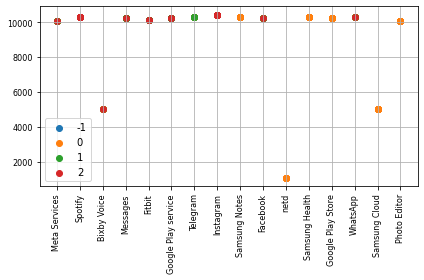

In [39]:
for cluster in clusters:
    row_ix = where(pred==cluster)
    plt.scatter(df[df.index.isin(row_ix[0])]['App name'], 
                df[df.index.isin(row_ix[0])]['UID'], label=cluster)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

In [40]:
plt.close('all')

# KMeans

In [41]:
model = KMeans(n_clusters=6, random_state=1)
pred = model.fit_predict(dfd)
clusters = unique(pred)
print("Number of found clusters: ", len(clusters))

Number of found clusters:  6


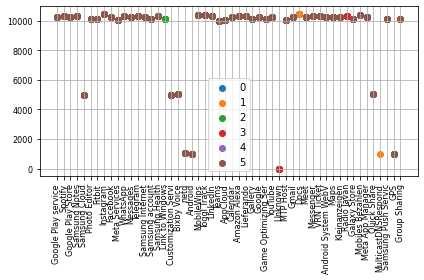

In [42]:
for cluster in clusters:
    row_ix = where(pred==cluster)
    plt.scatter(df[df.index.isin(row_ix[0])]['App name'], 
                df[df.index.isin(row_ix[0])]['UID'], label=cluster)
    
plt.grid()
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
plt.close('all')

In [193]:
df['Predictions'] = pred

In [194]:
df['App name'][df['Predictions']==0].unique()

array(['Google Play service', 'Samsung Notes', 'Photo Editor', 'Fitbit',
       'Samsung Internet', 'Instagram', 'Samsung account',
       'Samsung Health', 'Link to Windows', 'Telegram', 'MobileWips',
       'Spotify', 'Teams', 'AppCloud', 'Toggl Track', 'Amazon Alexa',
       'Gallery', 'Samsung Push Servic', 'Game Optimizing Ser',
       'MTP Host', 'Google Play Store', 'VRN Ticket'], dtype=object)

In [197]:
df['App name'][df['Predictions']==1].unique()

array(['Meta Services', 'Google Play service', 'Spotify', 'Messages',
       'Fitbit', 'Samsung Health', 'Telegram', 'Google Play Store',
       'Facebook', 'WhatsApp', 'Instagram', 'Samsung Notes',
       'Photo Editor', 'Google', 'Meta App Manager', 'Samsung Internet',
       'Samsung account', 'Messenger', 'Meet', 'Link to Windows',
       'MTP Host', 'LinkedIn', 'Maps', 'MobileWips', 'Toggl Track',
       'Teams', 'AppCloud', 'Calendar', 'Game Optimizing Ser',
       'Amazon Alexa', 'Lieferando', 'Gallery', 'Samsung Push Servic',
       'YouTube', 'Gmail', 'Docs', 'VRN Ticket', 'Android System WebV',
       'Kleinanzeigen', 'Radio Javan', 'Galaxy Store', 'Mobiles Bezahlen'],
      dtype=object)

In [196]:
df['App name'][df['Predictions']==2].unique()

array(['Meta Services', 'Spotify', 'Messages', 'Google Play service',
       'Samsung Health', 'Facebook', 'WhatsApp', 'Instagram', 'Fitbit',
       'Google', 'Meta App Manager', 'Google Play Store',
       'Samsung Internet', 'Samsung account', 'Messenger', 'Meet',
       'Link to Windows', 'MTP Host', 'Maps', 'Telegram', 'MobileWips',
       'Toggl Track', 'Teams', 'AppCloud', 'Calendar',
       'Game Optimizing Ser', 'Amazon Alexa', 'Lieferando', 'YouTube',
       'Gmail', 'Docs', 'VRN Ticket', 'Android System WebV',
       'Samsung Notes', 'Kleinanzeigen', 'Radio Javan', 'Galaxy Store',
       'Mobiles Bezahlen'], dtype=object)

In [198]:
df['App name'][df['Predictions']==3].unique()

array(['Spotify', 'Telegram', 'Fitbit', 'Facebook', 'Instagram',
       'Photo Editor', 'Google Play service', 'Meta App Manager',
       'Samsung Internet', 'Google', 'Samsung Notes', 'Samsung account',
       'Messages', 'Samsung Health', 'Link to Windows', 'MTP Host',
       'Messenger', 'LinkedIn', 'Google Play Store', 'Toggl Track',
       'WhatsApp', 'Teams', 'AppCloud', 'Game Optimizing Ser',
       'Amazon Alexa', 'Lieferando', 'Gmail', 'VRN Ticket', 'Maps'],
      dtype=object)

In [199]:
df['App name'][df['Predictions']==4].unique()

array(['netd', 'Bixby Voice', 'Samsung Cloud', 'Android',
       'Customization Servi', 'Unknown', 'Quick Share',
       'MulticastDNSRespond', 'GPS'], dtype=object)

In [200]:
df['App name'][df['Predictions']==5].unique()

array(['Meta Services', 'Messages', 'Spotify', 'Google Play service',
       'Fitbit', 'Samsung Health', 'Google Play Store', 'Facebook',
       'WhatsApp', 'Instagram', 'Samsung Notes', 'Photo Editor', 'Google',
       'Samsung Internet', 'Samsung account', 'Messenger', 'Meet',
       'Link to Windows', 'LinkedIn', 'Maps', 'Meta App Manager',
       'Telegram', 'MobileWips', 'Toggl Track', 'Teams', 'AppCloud',
       'Calendar', 'Game Optimizing Ser', 'Amazon Alexa', 'Lieferando',
       'Gallery', 'Samsung Push Servic', 'YouTube', 'MTP Host', 'Gmail',
       'Docs', 'VRN Ticket', 'Android System WebV', 'Kleinanzeigen',
       'Radio Javan', 'Group Sharing', 'Galaxy Store', 'Mobiles Bezahlen'],
      dtype=object)

# Mini-Batch K-Means

In [43]:
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters=2)
pred = model.fit_predict(dfd)
clusters = unique(pred)
print("Number of found clusters: ", len(clusters))

Number of found clusters:  2


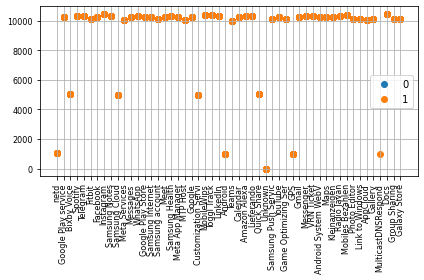

In [44]:
for cluster in clusters:
    row_ix = where(pred==cluster)
    plt.scatter(df[df.index.isin(row_ix[0])]['App name'], 
                df[df.index.isin(row_ix[0])]['UID'], label=cluster)
    
plt.grid()
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()

In [203]:
plt.close('all')

In [216]:
df['Prediction'] = pred

In [217]:
df['App name'][df['Prediction']==0].unique()

array(['Meta Services', 'Messages', 'Google Play service', 'Spotify',
       'Fitbit', 'Samsung Health', 'Telegram', 'Google Play Store',
       'Facebook', 'WhatsApp', 'Instagram', 'Samsung Notes',
       'Photo Editor', 'Google', 'Meta App Manager', 'Samsung Internet',
       'Samsung account', 'Messenger', 'Meet', 'Link to Windows',
       'MTP Host', 'LinkedIn', 'Maps', 'MobileWips', 'Toggl Track',
       'Teams', 'AppCloud', 'Calendar', 'Game Optimizing Ser',
       'Amazon Alexa', 'Lieferando', 'Gallery', 'Samsung Push Servic',
       'YouTube', 'Gmail', 'Docs', 'VRN Ticket', 'Android System WebV',
       'Kleinanzeigen', 'Radio Javan', 'Group Sharing', 'Galaxy Store',
       'Mobiles Bezahlen'], dtype=object)

In [218]:
df['App name'][df['Predictions']==1].unique()

array(['Meta Services', 'Google Play service', 'Spotify', 'Messages',
       'Fitbit', 'Samsung Health', 'Telegram', 'Google Play Store',
       'Facebook', 'WhatsApp', 'Instagram', 'Samsung Notes',
       'Photo Editor', 'Google', 'Meta App Manager', 'Samsung Internet',
       'Samsung account', 'Messenger', 'Meet', 'Link to Windows',
       'MTP Host', 'LinkedIn', 'Maps', 'MobileWips', 'Toggl Track',
       'Teams', 'AppCloud', 'Calendar', 'Game Optimizing Ser',
       'Amazon Alexa', 'Lieferando', 'Gallery', 'Samsung Push Servic',
       'YouTube', 'Gmail', 'Docs', 'VRN Ticket', 'Android System WebV',
       'Kleinanzeigen', 'Radio Javan', 'Galaxy Store', 'Mobiles Bezahlen'],
      dtype=object)

In [213]:
df['App name'][df['Predictions']==2].unique()

array(['Meta Services', 'Spotify', 'Messages', 'Google Play service',
       'Samsung Health', 'Facebook', 'WhatsApp', 'Instagram', 'Fitbit',
       'Google', 'Meta App Manager', 'Google Play Store',
       'Samsung Internet', 'Samsung account', 'Messenger', 'Meet',
       'Link to Windows', 'MTP Host', 'Maps', 'Telegram', 'MobileWips',
       'Toggl Track', 'Teams', 'AppCloud', 'Calendar',
       'Game Optimizing Ser', 'Amazon Alexa', 'Lieferando', 'YouTube',
       'Gmail', 'Docs', 'VRN Ticket', 'Android System WebV',
       'Samsung Notes', 'Kleinanzeigen', 'Radio Javan', 'Galaxy Store',
       'Mobiles Bezahlen'], dtype=object)

In [214]:
df['App name'][df['Predictions']==3].unique()

array(['Spotify', 'Telegram', 'Fitbit', 'Facebook', 'Instagram',
       'Photo Editor', 'Google Play service', 'Meta App Manager',
       'Samsung Internet', 'Google', 'Samsung Notes', 'Samsung account',
       'Messages', 'Samsung Health', 'Link to Windows', 'MTP Host',
       'Messenger', 'LinkedIn', 'Google Play Store', 'Toggl Track',
       'WhatsApp', 'Teams', 'AppCloud', 'Game Optimizing Ser',
       'Amazon Alexa', 'Lieferando', 'Gmail', 'VRN Ticket', 'Maps'],
      dtype=object)

# Mean Shift

In [45]:
from sklearn.cluster import MeanShift

model = MeanShift(bin_seeding=True)
pred = model.fit_predict(dfd.sample(25000, random_state=1))
clusters = unique(pred)
print("Number of found clusters: ", len(clusters))

Number of found clusters:  27


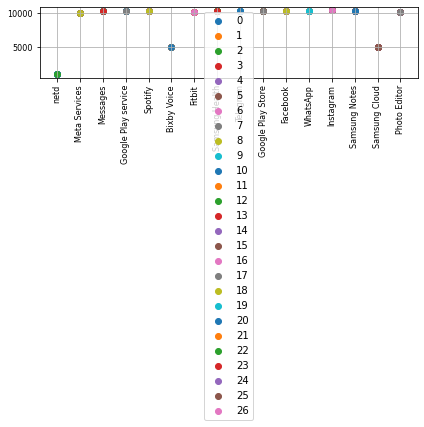

In [46]:
for cluster in clusters:
    row_ix = where(pred==cluster)
    plt.scatter(df[df.index.isin(row_ix[0])]['App name'], 
                df[df.index.isin(row_ix[0])]['UID'], label=cluster)
    
plt.grid()
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()

In [222]:
plt.close('all')

# OPTICS

In [47]:
from sklearn.cluster import OPTICS

model = OPTICS(eps=0.99999, min_samples=700)
pred = model.fit_predict(dfd.sample(50000, random_state=1))
clusters = unique(pred)
print("Number of found clusters: ", len(clusters))

Number of found clusters:  12


/home/wondermary/anaconda3/envs/NWDAF/lib/python3.8/site-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


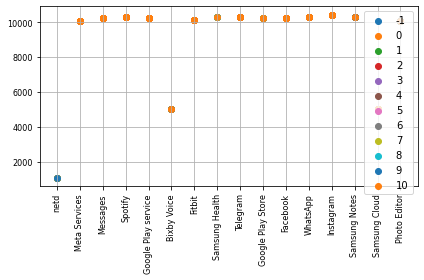

In [48]:
fig, ax = plt.subplots()

for cluster in clusters:
    row_ix = where(pred==cluster)
    plt.scatter(df[df.index.isin(row_ix[0])]['App name'], 
                df[df.index.isin(row_ix[0])]['UID'], label=cluster)
    
plt.legend()
plt.grid()
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
plt.close('all')

# Spectral Clustering

In [11]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=3)
pred = model.fit_predict(dfd.sample(10000, random_state=1))
clusters = unique(pred)
print("Number of found clusters: ", len(clusters))

Number of found clusters:  3


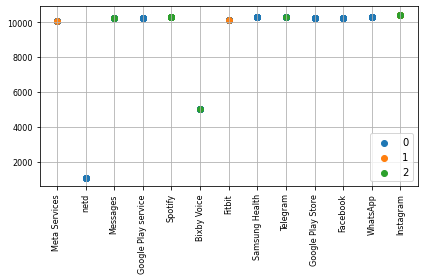

In [12]:
for cluster in clusters:
    row_ix = where(pred==cluster)
    plt.scatter(df[df.index.isin(row_ix[0])]['App name'], 
               df[df.index.isin(row_ix[0])]['UID'], label=cluster)
    
plt.legend()
plt.grid()
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [12]:
plt.close('all')

# Gaussian Mixture Model

In [13]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=5, tol=0.01)
pred = model.fit_predict(dfd)
clusters = unique(pred)
print("Number of found clusters: ", len(clusters))

Number of found clusters:  5


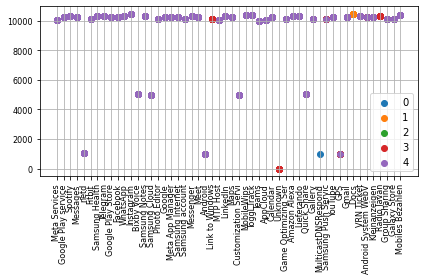

In [14]:
fig, ax = plt.subplots()

for cluster in clusters:
    row_ix = where(pred==cluster)
    plt.scatter(df[df.index.isin(row_ix[0])]['App name'],
               df[df.index.isin(row_ix[0])]['UID'], label=cluster)
    
plt.legend()
plt.grid()
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [16]:
plt.close('all')

In [15]:
df['Prediction'] = pred

In [16]:
df['App name'][df['Prediction']==0].unique()

array(['Meta Services', 'Google Play service', 'Spotify', 'Messages',
       'Fitbit', 'Samsung Health', 'Telegram', 'Google Play Store',
       'Facebook', 'WhatsApp', 'Instagram', 'Samsung Notes',
       'Photo Editor', 'Google', 'Meta App Manager', 'Samsung Internet',
       'Samsung account', 'Messenger', 'Meet', 'Link to Windows',
       'MTP Host', 'LinkedIn', 'Maps', 'MobileWips', 'Toggl Track',
       'Teams', 'AppCloud', 'Calendar', 'Game Optimizing Ser',
       'Amazon Alexa', 'Lieferando', 'Gallery', 'Samsung Push Servic',
       'YouTube', 'Gmail', 'Docs', 'VRN Ticket', 'Android System WebV',
       'Kleinanzeigen', 'Radio Javan', 'Galaxy Store', 'Mobiles Bezahlen'],
      dtype=object)

In [17]:
df['App name'][df['Prediction']==1].unique()

array(['Messages', 'Google Play service', 'Google Play Store'],
      dtype=object)

In [18]:
df['App name'][df['Prediction']==2].unique()

array(['Google Play service', 'Instagram', 'Google', 'Google Play Store',
       'Meet', 'Messages', 'Maps', 'Calendar', 'YouTube', 'Gmail',
       'Radio Javan'], dtype=object)

In [19]:
df['App name'][df['Prediction']==3].unique()

array(['Meta Services', 'Spotify', 'Messages', 'Google Play service',
       'Fitbit', 'Samsung Health', 'Telegram', 'Google Play Store',
       'Facebook', 'WhatsApp', 'Instagram', 'Samsung Notes',
       'Photo Editor', 'Google', 'Meta App Manager', 'Samsung Internet',
       'Samsung account', 'Messenger', 'Meet', 'Link to Windows',
       'MTP Host', 'LinkedIn', 'Maps', 'MobileWips', 'Toggl Track',
       'Teams', 'AppCloud', 'Calendar', 'Game Optimizing Ser',
       'Amazon Alexa', 'Lieferando', 'Gallery', 'Samsung Push Servic',
       'YouTube', 'Gmail', 'Docs', 'VRN Ticket', 'Android System WebV',
       'Kleinanzeigen', 'Radio Javan', 'Galaxy Store', 'Mobiles Bezahlen'],
      dtype=object)

In [20]:
df['App name'][df['Prediction']==4].unique()

array(['Meta Services', 'netd', 'Messages', 'Spotify',
       'Google Play service', 'Bixby Voice', 'Fitbit', 'Samsung Health',
       'Google Play Store', 'Facebook', 'WhatsApp', 'Instagram',
       'Samsung Notes', 'Samsung Cloud', 'Photo Editor', 'Google',
       'Samsung Internet', 'Samsung account', 'Messenger', 'Meet',
       'Android', 'Link to Windows', 'LinkedIn', 'Maps',
       'Meta App Manager', 'Telegram', 'Customization Servi',
       'MobileWips', 'Toggl Track', 'Unknown', 'Teams', 'AppCloud',
       'Calendar', 'Game Optimizing Ser', 'Amazon Alexa', 'Lieferando',
       'Quick Share', 'Gallery', 'MulticastDNSRespond',
       'Samsung Push Servic', 'YouTube', 'GPS', 'MTP Host', 'Gmail',
       'Docs', 'VRN Ticket', 'Android System WebV', 'Kleinanzeigen',
       'Radio Javan', 'Group Sharing', 'Galaxy Store', 'Mobiles Bezahlen'],
      dtype=object)

<AxesSubplot:>

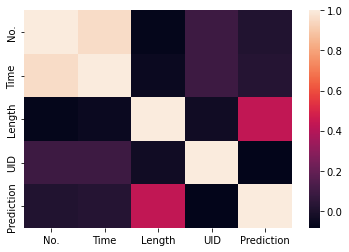

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

In [22]:
for item in df['App name'].unique():
    print(str(item), df['No.'][df['App name']==item].count())

Meta Services 16876
netd 96
Messages 40269
Google Play service 52535
Spotify 246609
Bixby Voice 3196
Fitbit 31919
Samsung Health 1805
Telegram 41971
Google Play Store 297061
Facebook 26427
WhatsApp 17830
Instagram 1676653
Samsung Notes 544
Samsung Cloud 1193
Photo Editor 38
Google 2735
Meta App Manager 184
Samsung Internet 5811
Samsung account 166
Messenger 1703
Meet 582
Android 1401
Link to Windows 126
MTP Host 30375
LinkedIn 1334
Maps 6041
Customization Servi 299
MobileWips 1075
Toggl Track 822
Unknown 47
Teams 1654
AppCloud 166
Calendar 325
Game Optimizing Ser 97
Amazon Alexa 4898
Lieferando 7488
Quick Share 69
Gallery 22
MulticastDNSRespond 1
Samsung Push Servic 22
YouTube 1036
GPS 77
Gmail 462
Docs 44
VRN Ticket 3038
Android System WebV 75
Kleinanzeigen 111
Radio Javan 122
Group Sharing 6
Galaxy Store 34
Mobiles Bezahlen 99


In [23]:
df[df['Time']==df['Time'].max()].filter(items=['App name'])

,App name
2528613,Telegram


# Convert the Feature Data to Categorical Type

In [24]:
df['Source'] = df['Source'].astype('category').cat.codes
df['Destination'] = df['Destination'].astype('category').cat.codes
df['Protocol'] = df['Protocol'].astype('category').cat.codes


df['Source'] = df['Source'].astype('category').cat.codes
df['Destination'] = df['Destination'].astype('category').cat.codes
df['Protocol'] = df['Protocol'].astype('category').cat.codes

In [25]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info,Prediction
0,1,0.000000,0,1,2,116,Meta Services,10081,0x01072021,Standard query 0xf8be A mqtt-mini.facebook.com,4
1,2,0.036580,0,1,12,112,netd,1051,0x01072021,58520 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...,4
2,3,0.048288,0,260,12,108,Meta Services,10081,0x01072021,45270 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...,0
3,4,0.053258,1,0,2,404,Meta Services,10081,0x01072021,Standard query response 0xf8be A mqtt-mini.fac...,4
4,5,0.072994,259,0,12,96,Meta Services,10081,0x01072021,"443 > 45270 [SYN, ACK] Seq=0 Ack=1 Win=1024 ...",0


In [ ]:
# enc = OneHotEncoder()
# enc.fit(df_train['Source'].values.reshape(-1, 1))
# df_train['Source'] = enc.transform(df_train['Source'].values.reshape(-1, 1)).toarray()
# enc.fit(df_train['Destination'].values.reshape(-1, 1))
# df_train['Destination'] = enc.transform(df_train['Destination'].values.reshape(-1, 1)).toarray()
# enc.fit(df_train['Protocol'].values.reshape(-1, 1))
# df_train['Protocol'] = enc.transform(df_train['Protocol'].values.reshape(-1, 1)).toarray()

# Convert the Labels to Categories

In [26]:
labels=df['App name']
features = df.iloc[:,0:4]
from sklearn.model_selection import train_test_split
X=features
y=np.ravel(labels)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2022055, 4)
(505514, 4)
(2022055,)
(505514,)


In [ ]:
# # Define column name of the label vector
# LABEL = 'ActivityEncoded'
# # Transform the labels from String to Integer via LabelEncoder
# le = LabelEncoder()
# # Add a new column to the existing DataFrame with the encoded values
# df_train['App name'] = le.fit_transform(df_train['App name'].values.ravel())
# df_test['App name'] = le.fit_transform(df_test['App name'].values.ravel())

# Normalize the Feature Data

In [28]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) 

In [29]:
x_train

array([[ 1.9305944 ,  1.47595788,  0.32873962, -0.40063165],
       [-1.32915874, -1.2362897 ,  0.61376373, -0.40063165],
       [ 0.91229237,  1.33585039, -0.43454529, -0.40063165],
       ...,
       [ 1.70457025,  1.44375746, -0.43454529, -0.40063165],
       [ 1.46757684,  1.40564362,  0.32873962, -0.40063165],
       [ 1.44899872,  1.40223339,  0.32873962, -0.40063165]])

In [ ]:
# df_train['Source'] = df_train['Source']/df_train['Source'].max()
# df_train['Destination'] = df_train['Destination']/df_train['Destination'].max()
# df_train['Protocol'] = df_train['Protocol']/df_train['Protocol'].max()
# df_train['Length'] = df_train['Length']/df_train['Length'].max()

In [ ]:
# scale_columns = ['Source', 'Destination', 'Protocol', 'Length']

# scaler = RobustScaler()

# scaler = scaler.fit(df_train[scale_columns].values)

# df_train.loc[:, scale_columns] = scaler.transform(
#   df_train[scale_columns].to_numpy()
# )

# df_test.loc[:, scale_columns] = scaler.transform(
#   df_test[scale_columns].to_numpy()
# )

# Spilit the Data to Train and Test

In [30]:
lb = LabelBinarizer()

lb = lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [31]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
print(np.unique(y_test))
print(np.unique(y_train))
print(y_train.shape)
print(y_test.shape)

[0 1]
[0 1]
(2022055, 52)
(505514, 52)


In [ ]:
# def create_dataset(X, y, step=1):
#     Xs, ys = [], []
#     for i in range(0, len(X) - 1, step):
#         v = X.iloc[i:i+1].values
#         labels = y.iloc[i:i+1]
#         Xs.append(v)
#         ys.append(labels)
#         # ys.append(stats.mode(labels, keepdims=True)[0][0])
#     return np.array(Xs), np.array(ys).reshape(-1, 1)

In [ ]:
# STEP = 1

# x_train, y_train = create_dataset(
#     df_train[['Source', 'Destination', 'Protocol', 'Length']],
#     df_train['App name'],
#     STEP
# )

# x_test, y_test = create_dataset(
#     df_test[['Source', 'Destination', 'Protocol', 'Length']],
#     df_test['App name'],
#     STEP
# )

In [ ]:
# df_train = df.iloc[:round(80*(len(df))/100),:]
# df_test = df.iloc[round(80*(len(df))/100):,:]

In [ ]:
# enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# enc = enc.fit(y_train)

# y_train = enc.transform(y_train)
# y_test = enc.transform(y_test)

# Create the Neural Network Model

In [33]:
model_m = Sequential()

model_m.add(Dense(200, activation='relu', input_shape=(4,)))
model_m.add(Dense(100, activation='relu'))
# model_m.add(Dense(600, activation='relu'))
# model_m.add(Dense(400, activation='relu'))
# model_m.add(Dense(200, activation='relu'))
model_m.add(Flatten())
model_m.add(Dropout(0.5))
model_m.add(Dense(y_train.shape[1], activation='softmax'))
print(model_m.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1000      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 52)                5252      
                                                                 
Total params: 26,352
Trainable params: 26,352
Non-trainable params: 0
_________________________________________________________________
None


2023-07-28 12:17:24.868041: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-07-28 12:17:24.868078: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wondermary-XPS-15-9510): /proc/driver/nvidia/version does not exist
2023-07-28 12:17:24.869044: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


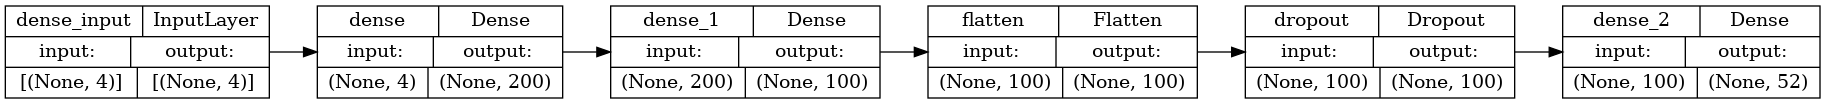

In [34]:
from keras.utils import plot_model
plot_model(model_m, to_file='model.png', show_shapes=True, rankdir="LR")

In [ ]:
# layer.get_config

# model.get_config()

In [ ]:
# stoplearn = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, 
# patience=0, verbose=0, mode='auto')


# callbacks=[stoplearn]

# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])


# set(y_test) - set(y_pred)

# import warnings
# warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"


# Train the Model

In [35]:
# optimizer = keras.optimizers.Adagrad()

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['categorical_accuracy'])

# Hyper-parameters
BATCH_SIZE = 64
EPOCHS = 20

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      validation_split=0.1,
                      verbose=1, shuffle=False)

Epoch 1/20
28436/28436 [==============================] - 53s 2ms/step - loss: 0.3912 - categorical_accuracy: 0.9058 - val_loss: 0.2668 - val_categorical_accuracy: 0.9321
Epoch 2/20
28436/28436 [==============================] - 53s 2ms/step - loss: 0.2895 - categorical_accuracy: 0.9283 - val_loss: 0.2291 - val_categorical_accuracy: 0.9398
Epoch 3/20
28436/28436 [==============================] - 54s 2ms/step - loss: 0.2642 - categorical_accuracy: 0.9343 - val_loss: 0.2098 - val_categorical_accuracy: 0.9480
Epoch 4/20
28436/28436 [==============================] - 55s 2ms/step - loss: 0.2503 - categorical_accuracy: 0.9376 - val_loss: 0.1992 - val_categorical_accuracy: 0.9491
Epoch 5/20
28436/28436 [==============================] - 48s 2ms/step - loss: 0.2408 - categorical_accuracy: 0.9395 - val_loss: 0.1931 - val_categorical_accuracy: 0.9487
Epoch 6/20
28436/28436 [==============================] - 48s 2ms/step - loss: 0.2334 - categorical_accuracy: 0.9411 - val_loss: 0.1904 - val_cat

In [36]:
model_m.evaluate(x_train,y_train)

63190/63190 [==============================] - 57s 903us/step - loss: 0.1557 - categorical_accuracy: 0.9579


[0.1557324081659317, 0.9578700661659241]

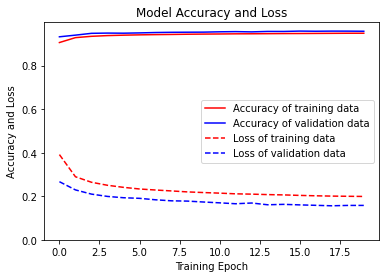

In [37]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['categorical_accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_categorical_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


# Test the Model

In [38]:
score = model_m.evaluate(x_test, y_test, verbose='auto')
print('Test loss:', score[0])
print('Test accuracy: ', score[1]*100)

15798/15798 [==============================] - 15s 969us/step - loss: 0.1568 - categorical_accuracy: 0.9576
Test loss: 0.15678484737873077
Test accuracy:  95.75541019439697


In [ ]:
# # Print confusion matrix for training data
# y_pred_train = model_m.predict(x_train)

# # Take the class with the highest probability from the train predictions
# max_y_pred_train = np.argmax(y_pred_train, axis=1)

# print(classification_report(y_train, max_y_pred_train))


In [ ]:
begin = 7400
end = 7450
pred = []

predictions = model_m.predict(x_test[begin:end])
arg_pred = np.argmax(predictions, axis=1)
# print("prediction:", arg_pred) 

classes = lb.classes_
for item in arg_pred:
    # print(classes[item], end="','")
    pred.append(classes[item])

gt = np.squeeze(lb.inverse_transform(y_test[begin:end]))

# print()
# print()
# print("ground truth:", gt)
data = {"Predictions": pred, "Ground Truth": gt}
results = pd.DataFrame(data=data)
results

In [ ]:
# y_pred = model_m.predict_classes(X_test)